In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
# Reading the training file
MLR= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [90]:
#Importing Total number of cases from the Total cases file
MLR_TC = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
MLR_TC.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [91]:
#looking up mean, count, Standard deviation and other details
MLR.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [92]:
#Telling us off 1456 records how many are NULL and non-Null values
MLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [93]:
# Importing the Total Number of cases 
MLR['Total_Cases'] = MLR_TC['total_cases']
MLR.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [94]:

#MLR = MLR.fillna(value=MLR.mean())
MLR.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [95]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
MLR.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,1.522551,...,7.129271,43.519806,1.537184,3.534237,1.273108,2.096879,1.945806,1.566475,47.095179,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,...,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,295.625714,...,80.369286,38.710000,17.065000,2.864286,27.385714,7.385714,32.800000,22.200000,24.450000,12.000000
75%,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,...,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [96]:
# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well 
# as for conducting statistical tests, and statistical data exploration.
import statsmodels.formula.api as smf
model = smf.ols("""Total_Cases ~ ndvi_ne + ndvi_nw + ndvi_se + ndvi_sw + precipitation_amt_mm + 
reanalysis_air_temp_k + reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k +
reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + reanalysis_relative_humidity_percent + 
reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg + reanalysis_tdtr_k +
station_avg_temp_c + station_diur_temp_rng_c + station_max_temp_c + station_min_temp_c + station_precip_mm""",
                data = MLR).fit()

In [97]:
model.params

Intercept                                2313.480381
ndvi_ne                                     6.791656
ndvi_nw                                    33.788055
ndvi_se                                    -9.965983
ndvi_sw                                     9.534587
precipitation_amt_mm                       -0.012374
reanalysis_air_temp_k                       2.018678
reanalysis_avg_temp_k                     -12.977802
reanalysis_dew_point_temp_k                 1.614337
reanalysis_max_air_temp_k                   1.124311
reanalysis_min_air_temp_k                   0.481623
reanalysis_precip_amt_kg_per_m2             0.029932
reanalysis_relative_humidity_percent       -3.087247
reanalysis_sat_precip_amt_mm               -0.012374
reanalysis_specific_humidity_g_per_kg      13.156309
reanalysis_tdtr_k                          -1.990844
station_avg_temp_c                         -0.136086
station_diur_temp_rng_c                    -2.005771
station_max_temp_c                          2.

In [98]:
# function excludes the character columns and gives summary statistics of numeric columns
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Cases   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     11.50
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.08e-33
Time:                        10:42:46   Log-Likelihood:                -7458.7
No. Observations:                1456   AIC:                         1.496e+04
Df Residuals:                    1436   BIC:                         1.506e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2313.4804   3660.602      0.632      0.527   -4867.221    9494.182
ndvi_ne                                   6.7917     15.221      0.446      0.656     -23.066      36.649
ndvi_nw                                  33.7881     16.922      1.997      0.046       0.594      66.982
ndvi_se                                  -9.9660     26.389     -0.378      0.706     -61.730      41.798
ndvi_sw                                   9.5346     25.350      0.376      0.707     -40.192      59.261
precipitation_amt_mm                     -0.0124      0.016     -0.761      0.447      -0.044       0.020
reanalysis_air_temp_k                     2.0187     14.868      0.136      0.892     -27.147      31.185
reanalysis_avg_temp_k                   -12.9778      6.974     -1.861      0.063     -26.659       0.703
reanalysis_dew_point_temp_k               1.6143     16.247      0.099      0.921     -30.256      33.485
reanalysis_max_air_temp_k                 1.1243      1.566      0.718      0.473      -1.947       4.195
reanalysis_min_air_temp_k                 0.4816      2.155      0.224      0.823      -3.745       4.709
reanalysis_precip_amt_kg_per_m2           0.0299      0.034      0.871      0.384      -0.037       0.097
reanalysis_relative_humidity_percent     -3.0872      2.931     -1.053      0.292      -8.837       2.662
reanalysis_sat_precip_amt_mm             -0.0124      0.016     -0.761      0.447      -0.044       0.020
reanalysis_specific_humidity_g_per_kg    13.1563     12.663      1.039      0.299     -11.683      37.996
reanalysis_tdtr_k                        -1.9908      2.056     -0.968      0.333      -6.024       2.043
station_avg_temp_c                       -0.1361      2.519     -0.054      0.957      -5.077       4.804
station_diur_temp_rng_c                  -2.0058      1.406     -1.426      0.154      -4.765       0.753
station_max_temp_c                        2.8840      1.428      2.020      0.044       0.083       5.685
station_min_temp_c                       -0.2240      1.682     -0.133      0.894      -3.524       3.076
station_precip_mm                         0.0070      0.028      0.255      0.799      -0.047       0.061
==============================================================================
Omnibus:                     1550.835   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94542.334
Skew:                           5.263   Prob(JB):                         0.00
Kurtosis:                      41.048   Cond. No.                     6.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

In [99]:
# taking the correlated attribues as my input for the X variable
x = MLR[[ 'weekofyear',  'reanalysis_air_temp_k','reanalysis_dew_point_temp_k',
          'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
          'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
          'reanalysis_specific_humidity_g_per_kg', 'station_max_temp_c','station_min_temp_c', ]]

In [100]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = MLR['Total_Cases'].values

In [101]:
# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [102]:
#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares 
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
reg = ml.fit(x_train, y_train)

In [103]:
reg.score(x_train,y_train)

0.14945950579588296

In [104]:
reg.score(x_test, y_test)

0.13717271810275045

In [105]:
#R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.13717271810275045

In [106]:
#importing LASSO REG from Liner Model
from sklearn import linear_model

In [107]:
LR = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
LR.fit(x_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [108]:
LR.score(x_train, y_train)

0.03805195453839216

In [109]:
#my Predicted Total Cases
y_pred=ml.predict(x_test)
y_pred

array([  6.7879893 ,  44.19613802,   7.64778624,  40.84163698,
        16.94889348,  37.48577692,  36.33342584,   7.15593194,
        41.44830111,  15.28367416,  18.89259492,  -5.63000387,
        15.97143365,  11.27805801,   5.81206106,   6.85810797,
        42.79848065,  21.89761405,  25.92709006,  36.94553621,
        33.31529762,   5.80713021,  26.66879969,  46.3063625 ,
        37.35540234,  34.89728953,  39.94747103,  18.65386062,
        40.15813401,   7.11681568,  46.39924156,   5.11477744,
        -4.94931808,   0.46549164,  11.57443451,  15.83555672,
        36.5431523 ,  43.44626401,  13.86208975,  10.80539374,
         6.97443571,  18.72443687,   5.00350199,  40.29904845,
        -1.5013825 ,  14.79828915,  32.39254677,  38.43564006,
        -4.31332653,   0.97919751,  10.1733641 ,   2.86869143,
         4.99570016,  18.44964832,  46.3180005 ,  49.25037326,
        18.51054132,   5.81263947,  12.15362224,   0.75776513,
        42.39802077,  27.94623167,  48.48775863,  29.82

In [110]:
#The mean absolute error is the sum of absolute errors over the length of observations / predictions
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

20.98865409783874

In [111]:
#Mean squared error regression loss, Return a a positive floating point value 
metrics.mean_squared_error(y_test, y_pred)

1670.8239049005433

In [112]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

40.87571289776538

# 

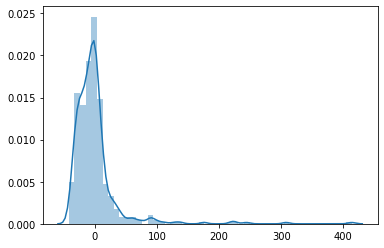

In [113]:
sns.distplot(y_test-y_pred)

In [114]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.13717271810275045